# Regression Evaluation Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

## 1. Load your zillow dataset.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import prepare
import acquire
import warnings
warnings.filterwarnings('ignore')

In [2]:
rawdf = acquire.get_zillow_data()

In [3]:
rawdf.head()

,latitude,longitude,bedrooms,bathrooms,square_feet,lot_size,fips_code,year_built,assessed_value,tax_amount
0,34184517.0,-118221043.0,3.0,3.0,2538.0,39238.0,6037.0,1966.0,878288.0,9635.37
1,33644714.0,-117616376.0,4.0,2.5,2761.0,5800.0,6059.0,1998.0,556255.0,8381.04
2,34262618.0,-118737528.0,3.0,2.5,1371.0,4321.0,6111.0,2012.0,404542.0,4705.74
3,34181076.0,-118336609.0,3.0,2.0,1676.0,7025.0,6037.0,1940.0,283892.0,3151.85
4,33814856.0,-118294446.0,4.0,3.0,2352.0,5398.0,6037.0,1989.0,293034.0,3839.25


In [4]:
df = prepare.prep_zillow(rawdf)

In [5]:
df.head()

,latitude,longitude,bedrooms,bathrooms,square_feet,lot_size,year_built,assessed_value,tax_amount,county
0,34184517.0,-118221043.0,3.0,3.0,2538.0,39238.0,1966,878288.0,9635.37,Los Angeles
1,33644714.0,-117616376.0,4.0,2.5,2761.0,5800.0,1998,556255.0,8381.04,Orange
2,34262618.0,-118737528.0,3.0,2.5,1371.0,4321.0,2012,404542.0,4705.74,Ventura
3,34181076.0,-118336609.0,3.0,2.0,1676.0,7025.0,1940,283892.0,3151.85,Los Angeles
4,33814856.0,-118294446.0,4.0,3.0,2352.0,5398.0,1989,293034.0,3839.25,Los Angeles


In [6]:
train, validate, test = prepare.split(df)

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `taxvaluedollarcnt` using only calfulatedfinishedsqft.

In [10]:
train.square_feet

37569     752.0
34742    1795.0
17160    1458.0
37728    1173.0
22416    1828.0
          ...  
14172    2724.0
34628    1278.0
14040    2826.0
13817    1274.0
52025    2039.0
Name: square_feet, Length: 27794, dtype: float64

In [14]:
train[['square_feet']]

,square_feet
37569,752.0
34742,1795.0
17160,1458.0
37728,1173.0
22416,1828.0
...,...
14172,2724.0
34628,1278.0
14040,2826.0
13817,1274.0


In [12]:
# Fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
lm.fit(train[['square_feet']], train.assessed_value)

# make prediction
train['yhat'] = lm.predict(train[['square_feet']])

train.head()

,latitude,longitude,bedrooms,bathrooms,square_feet,lot_size,year_built,assessed_value,tax_amount,county,yhat
37569,33863169.0,-118076077.0,2.0,1.0,752.0,4578.0,1945,344000.0,4288.63,Los Angeles,167217.134941
34742,34229579.0,-118605717.0,4.0,2.0,1795.0,13305.0,1963,79896.0,1190.07,Los Angeles,449021.085137
17160,34137359.0,-118406170.0,3.0,2.0,1458.0,13304.0,1950,527847.0,6478.29,Los Angeles,357968.418583
37728,34311526.0,-118421146.0,3.0,2.0,1173.0,7337.0,1957,342234.0,4137.93,Los Angeles,280965.421645
22416,33554928.0,-117631141.0,3.0,2.5,1828.0,2414.0,2002,600609.0,8503.78,Orange,457937.221625


#### Baseline Prediction

In [21]:
train['baseline'] = train['assessed_value'].mean()

## 3. Plot the residuals for the linear regression model that you made.

In [15]:
train['residual'] = train.yhat - train.assessed_value

In [22]:
train['baseline_residual'] = train.baseline - train.assessed_value

Text(0.5, 1.0, 'OLS model residuals')

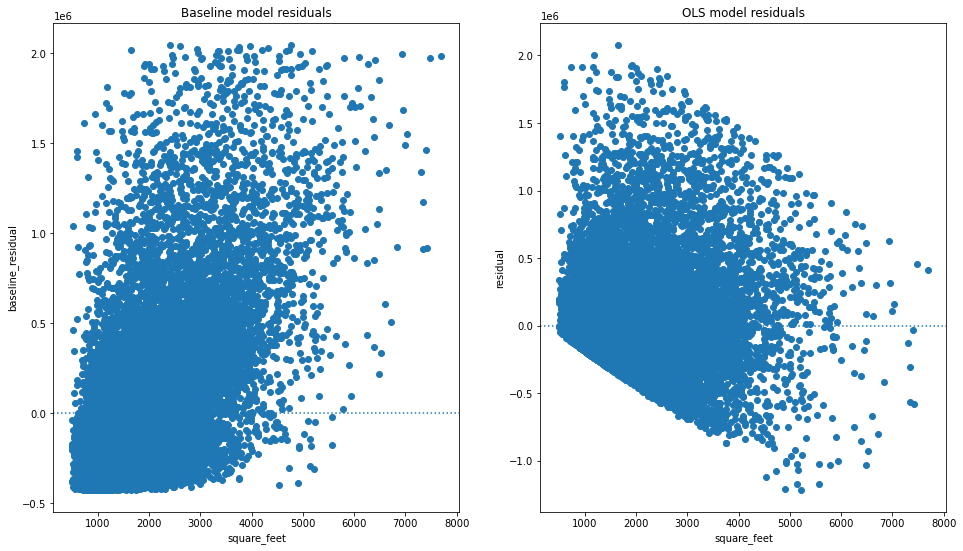

In [100]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.scatter(train.square_feet, train.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('square_feet')
plt.ylabel('baseline_residual')
plt.title('Baseline model residuals')

plt.subplot(122)
plt.scatter(train.square_feet, train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('square_feet')
plt.ylabel('residual')
plt.title('OLS model residuals')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [51]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

In [52]:
# sum of squared error

SSE = train['residual^2'].sum()
print('SSE =', "{:.1f}".format(SSE))

SSE = 2825798316298312.0


In [53]:
# mean of squared error

MSE = SSE/train.shape[0]

In [54]:
MSE = mean_squared_error(train.assessed_value, train.yhat)
print('MSE =', "{:.1f}".format(MSE))

MSE = 101669364477.9


In [55]:
# root mean squared error

RMSE = mean_squared_error(train.assessed_value, train.yhat, squared = False)
print('RMSE =', "{:.1f}".format(RMSE))

RMSE = 318856.3


In [56]:
# total sum of squares

TSS = SSE_baseline = train['baseline_residual^2'].sum()

In [57]:
# explained sum of squares

ESS = TSS - SSE
ESS

1427508860715305.5

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [45]:
# Baseline:
baseline_SSE = train['baseline_residual^2'].sum()
print('Basline SSE =', "{:.1f}".format(baseline_SSE))

Basline SSE = 4253307177013617.5


In [46]:
baseline_MSE = mean_squared_error(train.assessed_value, train.baseline)
print('MSE =', "{:.1f}".format(baseline_MSE))

MSE = 153029689034.1


In [48]:
baseline_RMSE = mean_squared_error(train.assessed_value, train.baseline, squared = False)
print('RMSE =', "{:.1f}".format(baseline_RMSE))

RMSE = 391190.1


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [58]:
if SSE < baseline_SSE:
    print('model performs better than baseline model')
else:
    print('model does not perform better than baseline model')

model performs better than baseline model


## 7. What is the amount of variance explained in your model?

In [61]:
R2 = ESS/TSS
print('Explained variance in model', "{:.2f}".format(R2))

Explained variance in model 0.34


## 8. Is your model better than the baseline model?

In [62]:
# Yes

## 9. Create a file named evaluate.py that contains the following functions.

### `plot_residuals(y, yhat)`: creates a residual plot

In [101]:
def plot_residuals(y, yhat):
    residual = yhat-y
    plt.figure(figsize = (6,6))
    plt.scatter(y, residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel('y')
    plt.ylabel('residual')
    plt.title('OLS model residuals')

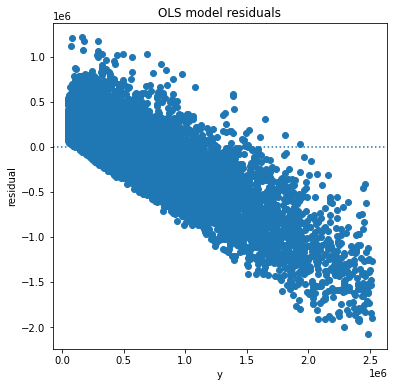

In [102]:
plot_residuals(train.assessed_value, train.yhat)

### `regression_errors(y, yhat)`: returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)


In [69]:
def regression_erros(y,yhat):
    SSE = ((yhat-y)**2).sum()
    ESS = ((yhat-y.mean())**2).sum()
    TSS = ((y-y.mean()**2)).sum()
    MSE = mean_squared_error(y,yhat)
    RMSE = sqrt(MSE)
    print(f'SSE = {SSE}, ESS = {ESS}, TSS = {TSS}, MSE = {MSE}, RMSE = {RMSE}')

In [70]:
regression_erros(train.assessed_value, train.yhat)

SSE = 2825798316298312.0, ESS = 1427508860715310.0, TSS = -6143902883999021.0, MSE = 101669364477.88416, RMSE = 318856.33830595895


### `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model

In [84]:
def baseline_mean_errors(y):
    baseline = y.mean()
    residual = baseline-y
    SSE = (residual**2).sum()
    MSE = SSE/y.shape[0]
    RMSE = sqrt(MSE)
    print(f'SSE = {SSE}, MSE = {MSE}, RMSE = {RMSE}')

In [85]:
baseline_mean_errors(train.assessed_value)

SSE = 4253307177013617.5, MSE = 153029689034.09433, RMSE = 391190.09322079504


### `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false`

In [90]:
def better_than_baseline(y,yhat):
    baseline = y.mean()
    baseline_residual = baseline-y
    residual = yhat -y
    SSE = (residual**2).sum()
    baseline_SSE = (baseline_residual**2).sum()

    if SSE < baseline_SSE:
        print('Result: model performs better than baseline model')
    else:
        print('Result: model does not perform better than baseline model')

In [91]:
better_than_baseline(train.assessed_value, train.yhat)

Result: model performs better than baseline model
